In [28]:
from pde import *
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import os

100%|██████████| 1.0/1.0 [00:14<00:00, 14.65s/it]    


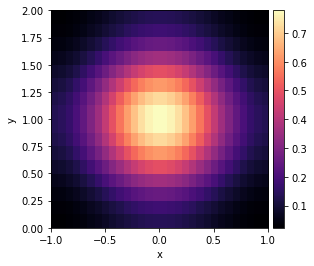

In [2]:
grid = CartesianGrid([[-1, 1], [0, 2]], [30, 16])  # generate grid
state = ScalarField(grid)  # generate initial condition
state.insert([0, 1], 1)

eq = DiffusionPDE(0.1)  # define the pde
result = eq.solve(state, t_range=1, dt=0.01)
result.plot(cmap="magma")


In [2]:
import json
def save_params(params, dir):
    with open(dir, "w") as file:
        json.dump(params, file)

d:\Repositories\WSN-Localization\vwsn\lib\site-packages\pde\fields\scalar.py:153: RuntimeWarning: overflow encountered in exp
  return self.__class__(self.grid, data=ufunc(*arrs, **kwargs))
d:\Repositories\WSN-Localization\vwsn\lib\site-packages\pde\fields\base.py:510: RuntimeWarning: overflow encountered in power
  op(self.data, other, out=result.data)
d:\Repositories\WSN-Localization\vwsn\lib\site-packages\pde\fields\base.py:504: RuntimeWarning: invalid value encountered in subtract
  op(self.data, other.data, out=result.data)


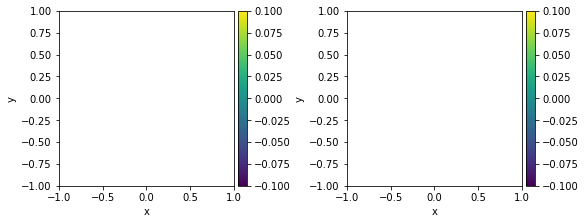

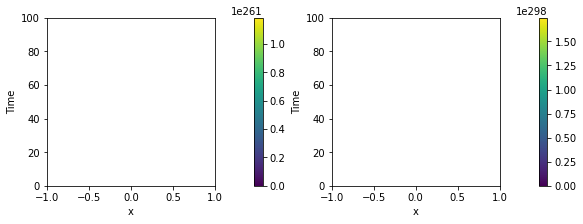

Done!


In [110]:
# https://py-pde.readthedocs.io/en/latest/examples_gallery/pde_coupled.html#sphx-glr-examples-gallery-pde-coupled-py

class FitzhughNagumoPDE(PDEBase):
    """FitzHugh–Nagumo model with diffusive coupling"""

    def __init__(
        self,
        stimulus=0.5,
        τ=10,
        a=0,
        b=0,
        D=1,
        w_h=1,
        w_l=0.5,
        bc="auto_periodic_neumann"
    ):
        self.bc = bc
        self.stimulus = stimulus
        self.τ = τ
        self.a = a
        self.b = b
        self.D = D
        self.w_h = w_h
        self.w_l = w_l

    def evolution_rate(self, state, t=0):
        v, w = state  # membrane potential and recovery variable

        v_t = self.D * v.laplace(bc=self.bc) + self.stimulus + (v - v**3 / 3 - w)# * self.τ
        w_t = (v + self.a - self.b * w) / self.τ * ((self.w_h - self.w_l) / (1 + np.exp(-4 * v)) + self.w_l)

        return FieldCollection([v_t, w_t])

if __name__ == "__main__":
    # grid = UnitGrid([32, 32])
    grid = CartesianGrid([[-1, 1], [-1, 1]], [40, 40])
    # state = FieldCollection.scalar_random_uniform(2, grid)
    dx = 1/40
    origin = np.array([20, 20])
    data = np.zeros(shape=(2, 40, 40))
    # data[:, 9, 10] = data[:, 10, 9] = data[:, 11, 10] = data[:, 10, 11] = -0.5
    # data[:, 10, 10] = -1
    data[0, 20, 20] = -1.0367
    data[1, 20, 20] = -0.6656

    # Cos init
    # for i in range(40):
    #     for j in range(40):
    #         pos = np.array([i, j]) - origin
    #         pos = pos.astype(np.float64)
    #         pos *= dx
    #         r = np.sqrt(np.dot(pos, pos))
    #         data[0, i, j] = np.cos(r * 10 * np.pi)
    #         data[1, i, j] = np.cos(r * 10 * np.pi)


    v_state = ScalarField(grid, data[0])
    w_state = ScalarField(grid, data[1])
    state = FieldCollection((v_state, w_state))

    # Good waves #1
    # params = {
    #     "a": 0.7,
    #     "b": 0.5,
    #     "τ": 1/0.85,
    #     "stimulus": 1,
    #     "D": 0.0001,
    #     "w_h": 0.6,
    #     "w_l": 0.4,
    # }

    
    # N = 128
    # T = 1000
    # t0 = 0
    # dt = 0.1
    # s = 0.02 # 0.02 # 0.10
    # D = 1.0
    # a = 0.5
    # b = 0.7
    # c = 0.3
    # I = 1.0 # 1.0 # 0.5 # 1.0
    # Other params
    params = {
        "stimulus": 0,
        "a": 0.5,
        "b": 0.7,
        "τ": 1/0.3,
        "w_h": 1,
        "w_l": 1,
        "D": 1
    }

    # Chick
    # params = {
    #     "a": 0.7,
    #     "b": 0.5,
    #     "τ": 1/0.44,
    #     "stimulus": 0,
    #     "w_h": 0.6,
    #     "w_l": 0.4,
    #     "D": 0.001
    # }
    memory_storage = MemoryStorage()
    eq = FitzhughNagumoPDE(**params)
    result = eq.solve(state, t_range=100, dt=0.01, tracker=[memory_storage.tracker(0.1)])
    result.plot()
    plot_kymographs(memory_storage)
    data = memory_storage.data
    data = np.array(data)
    vs = data[:, 0, :]
    ws = data[:, 1, :]

    save_images = False
    if save_images:
        for a in tqdm(range(0, 1000, 20)):
            fig = plt.figure()
            fig.set_size_inches((8, 3))
            axs = fig.subplots(1, 2, squeeze=False)
            axes_image = axs[0, 0].imshow(vs[a], vmin=vmin, vmax=vmax)
            plt.colorbar(axes_image, ax=axs[0, 0])
            axes_image = axs[0, 1].imshow(ws[a], vmin=vmin, vmax=vmax)
            plt.colorbar(axes_image, ax=axs[0, 1])
            plt.savefig(f"./fn_images/{a}.png")
            plt.close(fig)
    print("Done!")
    


In [ ]:
import pandas as pd

In [107]:
field = list(memory_storage.items())[0][1]

img_data = field.get_line_data(  # type: ignore
    index=0
)
img_data

{'data_x': array([-0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.675, -0.625,
        -0.575, -0.525, -0.475, -0.425, -0.375, -0.325, -0.275, -0.225,
        -0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
         0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
         0.625,  0.675,  0.725,  0.775,  0.825,  0.875,  0.925,  0.975]),
 'data_y': array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -1.0367,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ]),
 'extent_x': (-1.0, 1.0),
 'label_x': 'x',
 'label_y': 'Cut along x'}

In [ ]:

v_state = ScalarField(grid, data[0, 0])
w_state = ScalarField(grid, data[1, 0])
D = 1
bc = "auto_periodic_neumann"
τ = 1/0.44
stimulus = 0
v_t = D * v_state.laplace(bc=bc)# + τ * (v_state - v_state**3 / 3 - w_state) + stimulus
v_t.data
df = pd.DataFrame(v_t.data)
df.style


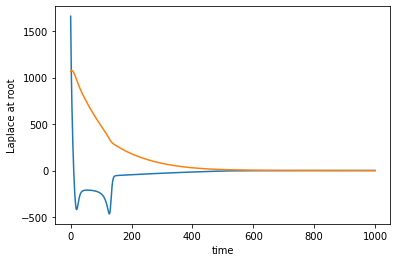

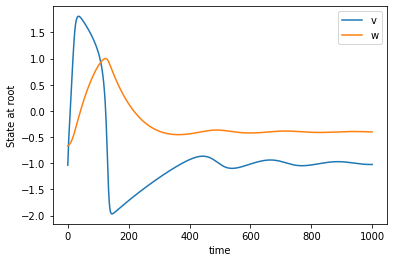

In [104]:
top_v = vs[:, 20, 20]
top_w = ws[:, 20, 20]
bc = "auto_periodic_neumann"
lap_v = np.empty(len(top_v))
lap_w = np.empty(len(top_w))
for a in range(len(top_v)):
    lap = ScalarField(grid, vs[a]).laplace(bc=bc)
    lap_v[a] = lap.data[20, 20]
    lap = ScalarField(grid, ws[a]).laplace(bc=bc)
    lap_w[a] = lap.data[20, 20]

plt.plot(lap_v)
plt.plot(lap_w)
plt.xlabel("time")
plt.ylabel("Laplace at root")
plt.show()
plt.plot(top_v, label="v")
plt.plot(top_w, label="w")
plt.legend()
plt.xlabel("time")
plt.ylabel("State at root")
plt.show()

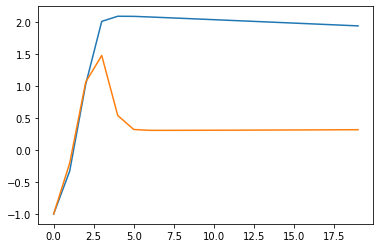

In [32]:
plt.plot(top_v[0:20])
plt.plot(lap_v[0:20])

In [25]:
vmin = None
vmax = None

In [78]:
vmin = -2
vmax = 2

In [30]:
ScalarField(grid, vs[0]).laplace(bc=bc).data[8:13,8:13]

array([[ 0. ,  0. , -0.5,  0. ,  0. ],
       [ 0. , -1. ,  1. , -1. ,  0. ],
       [-0.5,  1. ,  2. ,  1. , -0.5],
       [ 0. , -1. ,  1. , -1. ,  0. ],
       [ 0. ,  0. , -0.5,  0. ,  0. ]])

 22%|██▏       | 224/1000 [01:07<03:54,  3.31it/s]


KeyboardInterrupt: 

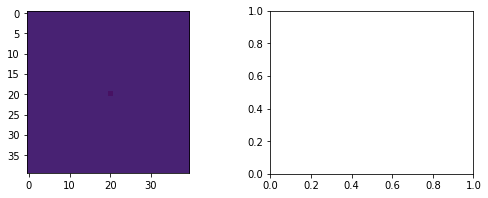

In [101]:

dir = "./fn_images/fixed_z_yamakou"
os.makedirs(dir, exist_ok=True)
save_params(params, f"{dir}/params.json")
for a in tqdm(range(0, 1000, 1)):
    fig = plt.figure()
    fig.set_size_inches((8, 3))
    axs = fig.subplots(1, 2, squeeze=False)
    axes_image = axs[0, 0].imshow(vs[a], vmin=vmin, vmax=vmax)
    plt.colorbar(axes_image, ax=axs[0, 0])
    axes_image = axs[0, 1].imshow(ws[a], vmin=vmin, vmax=vmax)
    plt.colorbar(axes_image, ax=axs[0, 1])
    plt.savefig(f"{dir}/{a}.png")
    plt.close(fig)

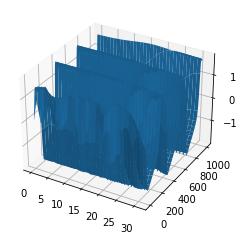

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
xs = range(data.shape[2])
ts = range(data.shape[0])
xs, ts = np.meshgrid(xs, ts)
ax.plot_surface(xs, ts, vs)
plt.show()


In [13]:

grid = UnitGrid([2, 32, 32])
# state = FieldCollection.scalar_random_uniform(2, grid)
data = np.zeros(shape=(2, 32, 32))
data[:, 10, 10] = 1
state = FieldCollection.scalar_random_uniform(2, grid)
print(type(state))
# state = ScalarField(grid, data)
v, w = state
print(v, w)

<class 'pde.fields.collection.FieldCollection'>
ScalarField(grid=UnitGrid(shape=(2, 32, 32), periodic=[False, False, False]), data=Array(2, 32, 32)) ScalarField(grid=UnitGrid(shape=(2, 32, 32), periodic=[False, False, False]), data=Array(2, 32, 32))
